In [ ]:
%pip install scipy --upgrade
%pip install gurobipy
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt
import numpy as np
import gurobipy as grb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Q1

（1)what is the average total profit if all projects are selected?

In [ ]:
initalCost = np.array([250,650,250,500,700,30,350,70])
pSuccess = np.array([0.9,0.7,0.6,0.4,0.8,0.6,0.7,0.9])
min = np.array([600,1200,500,1600,1150,150,750,220])
mode = np.array([750,1500,600,1800,1200,180,900,250])
max = np.array([900,1600,750,1900,1400,250,1000,320])
success_all = np.array([])
revenues_all = np.array([])
cost_all = np.array([])
np.random.seed(0)
for i in range(0,initalCost.size):
  S=100000
  revenues=np.zeros(S)
  success=np.zeros(S)
  cost = np.zeros(S)

  for s in range(S):
    success[s]=np.random.binomial(1,pSuccess[i],1)
    revenues[s]=success[s]*np.random.triangular(min[i],mode[i],max[i])
    cost[s] = initalCost[i]
  success_all = np.append(success_all, success)
  revenues_all = np.append(revenues_all, revenues)
  cost_all = np.append(cost_all, cost)

revenues_all = revenues_all.reshape(8,S)
cost_all = cost_all.reshape(8,S)
print(revenues_all)
print(cost_all)

revenues_all = np.swapaxes(revenues_all, 0, 1)
cost_all = np.swapaxes(cost_all , 0, 1)

profit_all = []
for i in range(0,revenues_all.shape[0]):
  profit_all.append(revenues_all[i].sum() - cost_all[i].sum())

print("average total profit: "+str(np.array(profit_all).mean()))


[[ 786.79011301  756.89075234  773.7670213  ...  728.80154956
   698.2756425   815.81382827]
 [1465.46179949    0.         1417.41018627 ... 1235.67843802
  1518.00912482 1293.40665719]
 [ 618.74703724  619.07327017  614.95097401 ...  643.59649357
   654.19983907  648.66087552]
 ...
 [   0.            0.            0.         ...  189.98767606
     0.          186.47184937]
 [   0.          898.18136257    0.         ...    0.
   977.79750985  842.02101196]
 [ 261.30249132  249.70765928  269.30448293 ...  233.51920646
   275.16883962  245.91444979]]
[[250. 250. 250. ... 250. 250. 250.]
 [650. 650. 650. ... 650. 650. 650.]
 [250. 250. 250. ... 250. 250. 250.]
 ...
 [ 30.  30.  30. ...  30.  30.  30.]
 [350. 350. 350. ... 350. 350. 350.]
 [ 70.  70.  70. ...  70.  70.  70.]]
average total profit: 1927.7835018066232


ANS:average profit is 1927.7835018066232

(2) In class, we obtain an optimal project selection using linear optimization. We now have another solution: Project(1,2,5,6,7). Please comment the profits earned and the probabilities of all selected projected being successful of these two solutions-10pts

For the example mentioned in class:
When selecting project: 1 2 4 6 7 8, what's the profit and p(success)?

In [ ]:
initalCost = np.array([250,650,250,500,700,30,350,70])
pSuccess = np.array([0.9,0.7,0.6,0.4,0.8,0.6,0.7,0.9])
min = np.array([600,1200,500,1600,1150,150,750,220])
mode = np.array([750,1500,600,1800,1200,180,900,250])
max = np.array([900,1600,750,1900,1400,250,1000,320])
selected = np.array([1,1,0,1,0,1,1,1])
success_all = np.array([])
revenues_all = np.array([])
cost_all = np.array([])
np.random.seed(0)
for i in range(0,initalCost.size):
  S=10000
  revenues=np.zeros(S)
  success=np.zeros(S)
  cost = np.zeros(S)

  for s in range(S):
    success[s]=np.random.binomial(1,pSuccess[i],1)*selected[i]
    revenues[s]=success[s]*np.random.triangular(min[i],mode[i],max[i])*selected[i]
    cost[s] = initalCost[i] * selected[i]
  success_all = np.append(success_all, success)
  revenues_all = np.append(revenues_all, revenues)
  cost_all = np.append(cost_all, cost)

success_all = success_all.reshape(8,S)
revenues_all = revenues_all.reshape(8,S)
cost_all = cost_all.reshape(8,S)
print(success_all)
print(revenues_all)
print(cost_all)

success_all = np.swapaxes(success_all, 0, 1)
revenues_all = np.swapaxes(revenues_all, 0, 1)
cost_all = np.swapaxes(cost_all , 0, 1)

profit_all = []
for i in range(0,revenues_all.shape[0]):
  profit_all.append(revenues_all[i].sum() - cost_all[i].sum())

print("Profit earned: "+str(np.array(profit_all).mean()))

[[1. 1. 1. ... 0. 1. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]
[[ 786.79011301  756.89075234  773.7670213  ...    0.
   741.74099342  770.24985191]
 [1270.27652766    0.            0.         ... 1483.20658816
     0.         1537.27287524]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 ...
 [ 224.08301199  167.39569025  205.04004602 ...  176.04351456
   215.97827865  167.67310404]
 [ 821.52639761    0.          886.10460471 ...  897.83959164
   867.16122751    0.        ]
 [ 282.2213867   285.99600946  249.14295387 ...  246.971317
   261.02909563  266.98685927]]
[[250. 250. 250. ... 250. 250. 250.]
 [650. 650. 650. ... 650. 650. 650.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [ 30.  30.  30. ...  30.  30.  30.]
 [350. 350. 350. ... 350. 350. 350.]
 [ 70.  70.  70. ...  70.  70.  70.]]
Profit earned: 1515.4507718274285


profits earned when project(1,2,4,6,7,8) are selected = 1515.4507718274285

In [ ]:
print(success_all)
count = 0
for i in range(success_all.shape[0]):
  if success_all[i, 0] == 1 and success_all[i,1] == 1 and success_all[i,3] == 1 and success_all[i,5] == 1 and success_all[i,6]==1 and success_all[i,7] == 1:
    count +=1
print("p[success] = "+str(count/success_all.shape[0]))

[[1. 1. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 ...
 [0. 1. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 0. 1.]]
p[success] = 0.0948


probability of success if project(1,2,4,6,7,8) are selected = 0.0948

What if we choose Project(1,2,5,6,7)

In [ ]:
initalCost = np.array([250,650,250,500,700,30,350,70])
pSuccess = np.array([0.9,0.7,0.6,0.4,0.8,0.6,0.7,0.9])
min = np.array([600,1200,500,1600,1150,150,750,220])
mode = np.array([750,1500,600,1800,1200,180,900,250])
max = np.array([900,1600,750,1900,1400,250,1000,320])
selected = np.array([1,1,0,0,1,1,1,0])
success_all = np.array([])
revenues_all = np.array([])
cost_all = np.array([])
np.random.seed(0)
for i in range(0,initalCost.size):
  S=10000
  revenues=np.zeros(S)
  success=np.zeros(S)
  cost = np.zeros(S)

  for s in range(S):
    success[s]=np.random.binomial(1,pSuccess[i],1)*selected[i]
    revenues[s]=success[s]*np.random.triangular(min[i],mode[i],max[i])*selected[i]
    cost[s] = initalCost[i] * selected[i]
  success_all = np.append(success_all, success)
  revenues_all = np.append(revenues_all, revenues)
  cost_all = np.append(cost_all, cost)

success_all = success_all.reshape(8,S)
revenues_all = revenues_all.reshape(8,S)
cost_all = cost_all.reshape(8,S)
print(success_all)
print(revenues_all)
print(cost_all)

success_all = np.swapaxes(success_all, 0, 1)
revenues_all = np.swapaxes(revenues_all, 0, 1)
cost_all = np.swapaxes(cost_all , 0, 1)

profit_all = []
for i in range(0,revenues_all.shape[0]):
  profit_all.append(revenues_all[i].sum() - cost_all[i].sum())

print("Profit earned:" +str(np.array(profit_all).mean()))


[[1. 1. 1. ... 0. 1. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[ 786.79011301  756.89075234  773.7670213  ...    0.
   741.74099342  770.24985191]
 [1270.27652766    0.            0.         ... 1483.20658816
     0.         1537.27287524]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 ...
 [ 224.08301199  167.39569025  205.04004602 ...  176.04351456
   215.97827865  167.67310404]
 [ 821.52639761    0.          886.10460471 ...  897.83959164
   867.16122751    0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]]
[[250. 250. 250. ... 250. 250. 250.]
 [650. 650. 650. ... 650. 650. 650.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [ 30.  30.  30. ...  30.  30.  30.]
 [350. 350. 350. ... 350. 350. 350.]
 [  0.   0.   0. ...   0.   0.   0.]]
Profit earned:1443.8547512365549


profits earned when project(1,2,5,6,7) are selected = 1443.8547512365549

In [ ]:
print(success_all)
count = 0
for i in range(success_all.shape[0]):
  if success_all[i, 0] == 1 and success_all[i,1] == 1 and success_all[i,4] == 1 and success_all[i,5] == 1 and success_all[i,6]==1:
    count +=1
print("p[success] = "+str(count/success_all.shape[0]))

[[1. 1. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 ...
 [0. 1. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 [1. 1. 0. ... 1. 0. 0.]]
p[success] = 0.209


probability of success if project(1,2,4,6,7,8) are selected = 0.209

# Q2

(1) what is the optimal seats open if we would like to maximize expected total profits? –10 pts

In [ ]:
seat = 19
demand=np.array(range(14,26,1))
demand_prob=np.array([0.03,0.05,0.07,0.09,0.11,0.15,0.18,0.14,0.08,0.05,0.03,0.02])
pshow=0.9
price=150
cost=325
S = 1000
#simdemand=np.random.choice(demand,p=demand_prob,size=5000)
def Perf(x):
  np.random.seed(0)
  profit = np.zeros(S)
  reserved = np.zeros(S)
  show = np.zeros(S)
  demands = np.random.choice(demand,p=demand_prob,size=S)

  for s in range(S):
    reserved[s] = x[0] if x[0] < demands[s] else demands[s] #demand and seat accepted
    show[s] = np.random.binomial(reserved[s], pshow, 1)

    profit[s] = price * reserved[s]-cost*(0 if 0 > (show[s]-seat) else show[s]-seat)
  return -1*profit.mean()



res=opt.minimize(Perf, [0], method='Nelder-Mead', bounds=[(19,26)])
print(res.x)
print(res.fun*-1)
print(res)

<ipython-input-49-a0a228c8b29e>:25: OptimizeWarning: Initial guess is not within the specified bounds
  res=opt.minimize(Perf, [0], method='Nelder-Mead', bounds=[(19,26)])


[20.99999962]
2818.224981803894
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -2818.224981803894
             x: [ 2.100e+01]
           nit: 30
          nfev: 62
 final_simplex: (array([[ 2.100e+01],
                       [ 2.100e+01]]), array([-2.818e+03, -2.818e+03]))


if we sell 20.99999609 seats, we can earn the maximum profits：2818.2248136718763

(2) if you are a conservative manager, what are the alternative performance metric as well as the optimal decision you would make? What are lost sales under that decision? –10 pts

I want to know where the minimum variance occurs, which means that the profit is more stable to be on the average number.

In [ ]:
seat = 19
demand=np.array(range(14,26,1))
demand_prob=np.array([0.03,0.05,0.07,0.09,0.11,0.15,0.18,0.14,0.08,0.05,0.03,0.02])
pshow=0.9
price=150
cost=325
S = 1000
#simdemand=np.random.choice(demand,p=demand_prob,size=5000)
def Perf_2(x):
  np.random.seed(0)
  profit = np.zeros(S)
  reserved = np.zeros(S)
  show = np.zeros(S)
  demands = np.random.choice(demand,p=demand_prob,size=S)

  for s in range(S):
    reserved[s] = x[0] if x[0] < demands[s] else demands[s] #demand and seat accepted
    show[s] = np.random.binomial(reserved[s], pshow, 1)

    profit[s] = price * reserved[s]-cost*(0 if 0 > (show[s]-seat) else show[s]-seat)
  return profit.std()
  #return [-1*profit.mean(),profit.std(), sms.DescrStatsW(profit).tconfint_mean()]

res=opt.minimize(Perf_2, [0], method='Nelder-Mead', bounds=[(19,26)])
print(res.x)
print(res.fun)
print(res)
print(Perf(res.x) * -1)

[19.]
207.47331756156018
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 207.47331756156018
             x: [ 1.900e+01]
           nit: 2
          nfev: 4
 final_simplex: (array([[ 1.900e+01],
                       [ 1.900e+01]]), array([ 2.075e+02,  2.075e+02]))
2721.15


<ipython-input-50-5441625bff7f>:24: OptimizeWarning: Initial guess is not within the specified bounds
  res=opt.minimize(Perf_2, [0], method='Nelder-Mead', bounds=[(19,26)])


The minimum variance of profits occurs when selling 19 seats.  

Variance: 207.47331756156018

Under the situation of minimum variance, the lost sales is...

In [ ]:
# lost sales
def Perf_3(x):
  np.random.seed(0)
  profit = np.zeros(S)
  reserved = np.zeros(S)
  show = np.zeros(S)
  demands = np.random.choice(demand,p=demand_prob,size=S)
  lost_sale = np.zeros(S)
  for s in range(S):
    reserved[s] = x[0] if x[0] < demands[s] else demands[s] #demand and seat accepted
    show[s] = np.random.binomial(reserved[s], pshow, 1)
    profit[s] = price * reserved[s]-cost*(0 if 0 > (show[s]-seat) else show[s]-seat)
    lost_sale[s] = 0 if 0 > (demands[s] - x[0]) else demands[s] - x[0]
  prob_lost_sale = np.count_nonzero(lost_sale > 0)/S
  return lost_sale.mean(), prob_lost_sale

print(Perf_3(res.x))

(1.17, 0.483)


the probability of lost sales occuring is 0.483 and the average lost sales is 1.17 customers unsatisfied.

please compare and comment on the seat decision as well as the profit distribution of Q2-1 with those of Q2-2. –10 pts

profit distribution

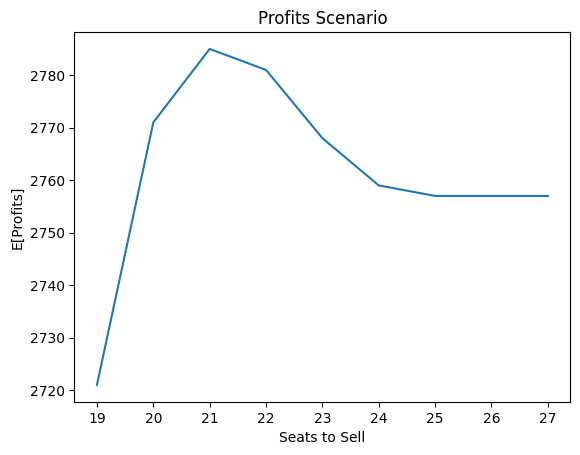

In [ ]:
Qs = np.array(range(19,28,1))
Eprofits = np.zeros(len(Qs))
profits = np.zeros((len(Qs), S))
pshow = 0.9
seats = 19
for i in range(len(Qs)):
    #should we resample demand?
    np.random.seed(0)
    simdemand=np.random.choice(demand,replace=True,p=demand_prob,size=1000)
    for s in range(S):
      d=simdemand[s]
      reserved=d if d < Qs[i] else Qs[i]
      #same demands associated with differernt show-ups?
      show=np.random.binomial(reserved,pshow,1)
      profits[i,s]=price*reserved-cost*(0 if 0 > show-seats else show-seats)
    Eprofits[i]=round(np.mean(profits[i]))
Qs[np.argmax(Eprofits)]
plt.plot(Qs,Eprofits)
plt.xlabel("Seats to Sell")
plt.ylabel("E[Profits]")
plt.title("Profits Scenario")
plt.show()

lost sales and bumped customer

[1.17  0.687 0.369 0.182 0.074 0.017 0.    0.    0.   ]
[0.    0.071 0.174 0.272 0.361 0.415 0.431 0.431 0.431]


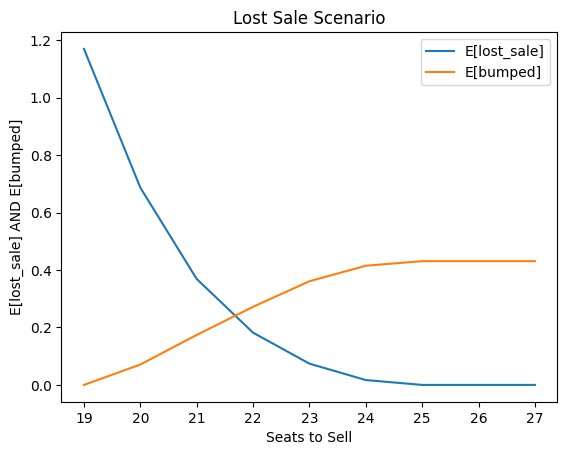

In [ ]:
Qs = np.array(range(19,28,1))
Elost_sale = np.zeros(len(Qs))
lost_sale = np.zeros((len(Qs), S))
bumped = np.zeros((len(Qs),S))
Ebumped = np.zeros(len(Qs))
pshow = 0.9
seats = 19
for i in range(len(Qs)):
    #should we resample demand?
    np.random.seed(0)
    simdemand=np.random.choice(demand,replace=True,p=demand_prob,size=1000)
    for s in range(S):
      d=simdemand[s]
      reserved=d if d < Qs[i] else Qs[i]
      reserved = Qs[i] if Qs[i] < d else d
      #same demands associated with differernt show-ups?
      show=np.random.binomial(reserved,pshow,1)
      bumped[i,s] = show -seats if show-seats > 0 else 0
      lost_sale[i,s] = 0 if 0 > (simdemand[s] - Qs[i]) else simdemand[s] - Qs[i]

    Elost_sale[i]=(np.mean(lost_sale[i]))
    Ebumped[i] = np.mean(bumped[i])
print(Elost_sale)
print(Ebumped)
Qs[np.argmax(Elost_sale)]
Qs[np.argmax(Ebumped)]
plt.plot(Qs,Elost_sale, label = "E[lost_sale]")
plt.plot(Qs, Ebumped, label = "E[bumped]")
plt.xlabel("Seats to Sell")
plt.ylabel("E[lost_sale] AND E[bumped]")
plt.title("Lost Sale Scenario")
plt.legend()
plt.show()

Q2-1 所提供的最佳銷售量為20.9999可近似於21張機票，
根據第一張圖，售出21張機票時，獲利確實為最高，為2818.22
根據第二張圖lost sales為平均0.369人，有出現卻無法上機的平均人數為0.174人


Q2-2 所提供的最佳銷售量為19張機票，
根據上圖，售出19張機票時的獲利是最低的，約為2721
根據第二張圖lost sales平均人數為1.17人，有出現卻無法上機的平均人數為0人


(3) how would you incorporate lost sales into the decision-making? Please implement the optimization with lost sales considered. -10pts/

設定當lost_sale在該服務人數下的發生機率，若超過0.2，則給予懲罰。
可在平均獲利後面加上懲罰項，使得目標式能考慮lost sales

In [ ]:
seat = 19
demand=np.array(range(14,26,1))
demand_prob=np.array([0.03,0.05,0.07,0.09,0.11,0.15,0.18,0.14,0.08,0.05,0.03,0.02])
pshow=0.9
price=150
cost=325
S = 1000

def Perf_4(x):
  np.random.seed(0)
  profit = np.zeros(S)
  reserved = np.zeros(S)
  show = np.zeros(S)
  demands = np.random.choice(demand,p=demand_prob,size=S)
  lost_sale = np.zeros(S)
  for s in range(S):
    reserved[s] = x[0] if x[0] < demands[s] else demands[s] #demand and seat accepted
    show[s] = np.random.binomial(reserved[s], pshow, 1)
    lost_sale[s] = 0 if 0 > (demands[s] - x[0]) else demands[s] - x[0]
    profit[s] = price * reserved[s]-cost*(0 if 0 > (show[s]-seat) else show[s]-seat)
  prob_lost_sale = np.count_nonzero(lost_sale > 0)/S
  lamda = 1000
  thres = 0.2
  return -1*profit.mean() + lamda * (prob_lost_sale-thres if prob_lost_sale-0.2 > 0 else 0)



res=opt.minimize(Perf_4, [0], method='Nelder-Mead', bounds=[(19,26)])
print(res.x)
print(res.fun*-1)
print(res)

for i in range(15,30):
  print(str(i)+": "+str(Perf_4([i]) * -1))

<ipython-input-54-dbee781f3d39>:28: OptimizeWarning: Initial guess is not within the specified bounds
  res=opt.minimize(Perf_4, [0], method='Nelder-Mead', bounds=[(19,26)])


[21.99999943]
2812.799983949661
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -2812.799983949661
             x: [ 2.200e+01]
           nit: 31
          nfev: 63
 final_simplex: (array([[ 2.200e+01],
                       [ 2.200e+01]]), array([-2.813e+03, -2.813e+03]))
15: 1523.65
16: 1737.9499999999998
17: 1948.85
18: 2185.15
19: 2438.15
20: 2652.525
21: 2784.75
22: 2780.95
23: 2768.225
24: 2759.225
25: 2756.575
26: 2756.575
27: 2756.575
28: 2756.575
29: 2756.575


結合lost sales後，最佳解變成21.999999943，約為22

# Q3

 (1) If you were Sanjay, what questions about the potential monthly salary at the restaurant (before the partnership opportunity) would you want to answer before making the decision? –9 pts.

I would ask
1. the standard deviation of profit
2. the condfidence interval under 95% confidence level of the average profit
3. the 50 percentile of profit
4. the value at risk (the 5 percentile of profit)
5. the probability that I have net loss
6. the probability that my profit is less than 3500



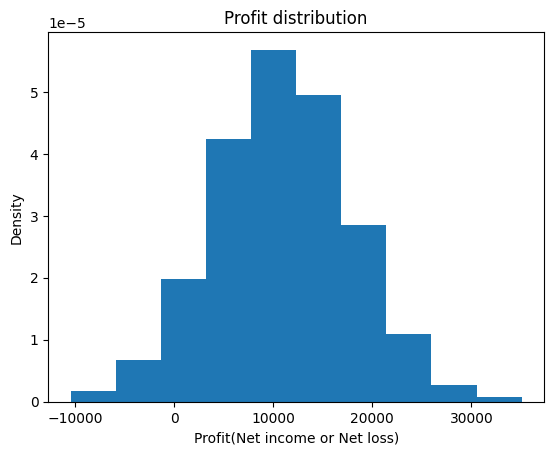

the standard deviation of profit earned: 6908.325097922031
the confidence interval: (10788.802517355642, 11059.650211808017)
the fifty percentile of the profit distribution: 10888.352027027708
the value at risk: -303.4983554346045
the probability that the net loss occurred: 0.054
the probability that the profit earned higher than the 3500: 0.8616


In [ ]:
import statsmodels.stats.api as sms

S = 10000
np.random.seed(0)
variable_cost = 11 #per meal
fixed_cost = 3995
fixed_meal_price = np.array([20,18.5,16.5,15])
prob_meal = np.array([0.25,0.35,0.3,0.1])
meal_gain = np.zeros(S)
meal_sold = np.zeros(S)
labor_cost = np.zeros(S)
profit = np.zeros(S)
for s in range(S):
  meal_sold[s] = np.abs(np.random.normal(3000, 1000, 1)) #先挑出共賣出多少餐點
  price = np.random.choice(fixed_meal_price,p=prob_meal,size=int(meal_sold[s])) #根據賣出的數量來來sample相應的售價
  meal_gain[s] = price.sum() # price * demand
  labor_cost[s] = np.random.uniform(5040, 6860, 1)
  profit[s] = (meal_gain[s] - labor_cost[s] - variable_cost*meal_sold[s] - fixed_cost)

n2, bins2, patches2 = plt.hist(profit, density=True)
plt.xlabel("Profit(Net income or Net loss)")
plt.ylabel("Density")
plt.title("Profit distribution")
plt.show()
print("the standard deviation of profit earned: "+str(profit.std()))
print("the confidence interval: "+ str(sms.DescrStatsW(profit).tconfint_mean()))
print("the fifty percentile of the profit distribution: "+str(np.percentile(profit, 50)))
print("the value at risk: "+str(np.percentile(profit, 5)))
print("the probability that the net loss occurred: "+str(np.count_nonzero(profit < 0)/S))
print("the probability that the profit earned higher than the 3500: "+str(np.count_nonzero(profit > 3500)/S))

(2) Given the monthly salary, would you accept the partnership opportunity? –9 pts

Simulation of not accepting partnership

In [ ]:
S = 10000
np.random.seed(0)
variable_cost = 11 #per meal
fixed_cost = 3995
fixed_meal_price = np.array([20,18.5,16.5,15])
prob_meal = np.array([0.25,0.35,0.3,0.1])
meal_gain = np.zeros(S)
meal_sold = np.zeros(S)
labor_cost = np.zeros(S)
profit = np.zeros(S)
for s in range(S):
  meal_sold[s] = np.abs(np.random.normal(3000, 1000, 1)) #先挑出共賣出多少餐點
  price = np.random.choice(fixed_meal_price,p=prob_meal,size=int(meal_sold[s])) #根據賣出的數量來來sample相應的售價
  meal_gain[s] = price.sum() # price * demand
  labor_cost[s] = np.random.uniform(5040, 6860, 1)
  profit[s] = (meal_gain[s] - labor_cost[s] - variable_cost*meal_sold[s] - fixed_cost)
print(profit)
print(meal_sold)
print(meal_gain)
print(labor_cost)

print("the average monthly profit if not accepting partnership: " + str(profit.mean()))

[22391.69207045 13590.76888996 13103.02262822 ... 18751.86251722
 13091.0910353  13529.95627491]
[4764.05234597 3400.15720837 3213.39128871 ... 4124.42312412 3325.17967077
 3356.33379909]
[85409.5 61108.  57649.5 ... 73804.  59741.  60245. ]
[6618.2321239  6120.501818   5204.17319592 ... 5688.48311746 6077.9325862
 5800.37193509]
the average monthly profit if not accepting partnership: 10924.22636458183


Simulation of accepting partnership

In [ ]:
S = 10000
np.random.seed(0)
variable_cost = 11 #per meal
fixed_cost = 3995
fixed_meal_price = np.array([20,18.5,16.5,15])
prob_meal = np.array([0.25,0.35,0.3,0.1])
meal_gain = np.zeros(S)
meal_sold = np.zeros(S)
labor_cost = np.zeros(S)
profit_2 = np.zeros(S)
for s in range(S):
  meal_sold[s] = np.abs(np.random.normal(3000, 1000, 1)) #先挑出共賣出多少餐點
  price = np.random.choice(fixed_meal_price,p=prob_meal,size=int(meal_sold[s])) #根據賣出的數量來來sample相應的售價
  meal_gain[s] = price.sum() # price * demand
  labor_cost[s] = np.random.uniform(5040, 6860, 1)
  profit_2[s] = (meal_gain[s] - labor_cost[s] - variable_cost*meal_sold[s] - fixed_cost)
  if(profit_2[s] < 3500):
    profit_2[s] = 3500
  elif(profit_2[s] > 9000):
    profit_2[s] = 9000 + 0.1*(profit_2[s] - 9000)
  else:
    profit_2[s] = profit_2[s]
print(profit_2)
print(meal_sold)
print(meal_gain)
print(labor_cost)

print("the average monthly profit if accepting partnership: "+str(profit_2.mean()))

[10339.16920705  9459.076889    9410.30226282 ...  9975.18625172
  9409.10910353  9452.99562749]
[4764.05234597 3400.15720837 3213.39128871 ... 4124.42312412 3325.17967077
 3356.33379909]
[85409.5 61108.  57649.5 ... 73804.  59741.  60245. ]
[6618.2321239  6120.501818   5204.17319592 ... 5688.48311746 6077.9325862
 5800.37193509]
the average monthly profit if accepting partnership: 7975.488621017121


Therefore, I would say no to the partnership

(3) Other than the two considerations of (2), can you estimate P(profits of no partnership > profits of partnership)?-6pts

In [ ]:
difference = profit - profit_2
print(difference.shape)
print(np.count_nonzero(difference > 0))
print(np.count_nonzero(difference < 0))
print(np.count_nonzero(difference == 0))
prob = np.count_nonzero(difference > 0)/difference.shape[0]
print("P(profits of no partnership > profits of partnership) = "+str(prob))

(10000,)
6071
1384
2545
P(profits of no partnership > profits of partnership) = 0.6071


(4) In terms of yearly salary, how would you make the decision? -14pts

I would sample every 12 month and sum them up as a year.
Then we can simulate the profits of every year and make the decision.

Simulation of not accepting partnership in terms of yearly salary

In [ ]:
S = 6000
np.random.seed(0)
variable_cost = 11 #per meal
fixed_cost = 3995
fixed_meal_price = np.array([20,18.5,16.5,15])
prob_meal = np.array([0.25,0.35,0.3,0.1])
meal_gain = np.zeros(S)
meal_sold = np.zeros(S)
labor_cost = np.zeros(S)
profit = np.zeros(S)
profit_yearly = np.zeros(int(S/12))
for s in range(S):
  meal_sold[s] = np.abs(np.random.normal(3000, 1000, 1)) #先挑出共賣出多少餐點
  price = np.random.choice(fixed_meal_price,p=prob_meal,size=int(meal_sold[s])) #根據賣出的數量來來sample相應的售價
  meal_gain[s] = price.sum() # price * demand
  labor_cost[s] = np.random.uniform(5040, 6860, 1)
  profit[s] = (meal_gain[s] - labor_cost[s] - variable_cost*meal_sold[s] - fixed_cost)
profit = profit.reshape(int(S/12), 12)
for s in range(int(S/12)):
  profit_yearly[s] = profit[s].sum()
print("average yearly profit: "+str(profit_yearly.mean()))
print("the standard deviation of yearly profit: "+str(profit_yearly.std()))

average yearly profit: 130213.93106270283
the standard deviation of yearly profit: 22285.408437392332


Simulation of accepting partnership

In [ ]:
S = 6000
np.random.seed(0)
variable_cost = 11 #per meal
fixed_cost = 3995
fixed_meal_price = np.array([20,18.5,16.5,15])
prob_meal = np.array([0.25,0.35,0.3,0.1])
meal_gain = np.zeros(S)
meal_sold = np.zeros(S)
labor_cost = np.zeros(S)
profit_2 = np.zeros(S)
profit_yearly = np.zeros(int(S/12))
for s in range(S):
  meal_sold[s] = np.abs(np.random.normal(3000, 1000, 1)) #先挑出共賣出多少餐點
  price = np.random.choice(fixed_meal_price,p=prob_meal,size=int(meal_sold[s])) #根據賣出的數量來來sample相應的售價
  meal_gain[s] = price.sum() # price * demand
  labor_cost[s] = np.random.uniform(5040, 6860, 1)
  profit_2[s] = (meal_gain[s] - labor_cost[s] - variable_cost*meal_sold[s] - fixed_cost)
  if(profit_2[s] < 3500):
    profit_2[s] = 3500
  elif(profit_2[s] > 9000):
    profit_2[s] = 9000 + 0.1*(profit_2[s] - 9000)
  else:
    profit_2[s] = profit_2[s]

profit_2 = profit_2.reshape(int(S/12), 12)

for s in range(int(S/12)):
  profit_yearly[s] = profit_2[s].sum()
  #print(profit_2[s].sum())

print("average yearly profit: "+str(profit_yearly.mean()))
print("the standard deviation of yearly profit: "+str(profit_yearly.std()))

average yearly profit: 95541.73905316784
the standard deviation of yearly profit: 7858.041246407852


My decision in terms of yearly profit would be not accepting partnership because I can get higher net income if I don't accepting partnership

(5) how would you extend the model to make it fit to the reality better? Please provide the python code of your proposed assumption. - 6pts


可以考慮餐廳可接納的人數。
假設餐廳營業時間為一天4小時，
該餐廳在每一小時來客數量follow a normal distribution(40, 15)
每位顧客的用餐時間皆為1小時，
且每位顧客皆點一份meal
當餐廳坐滿時就不接待新客人，
而餐廳座位數為50位


因此根據以上假設
一個月的的來客數量，可透過從每小時來客人數的分佈抽樣240次，得到一個月的總銷售，再由此估算年收入

In [ ]:
S = 6000
S_2 = S*120
np.random.seed(0)
variable_cost = 11 #per meal
fixed_cost = 3995
seat = 50
fixed_meal_price = np.array([20,18.5,16.5,15])
prob_meal = np.array([0.25,0.35,0.3,0.1])
meal_gain = np.zeros(S)
meal_sold_daily = np.zeros(S_2)
meal_sold = np.zeros(S)
labor_cost = np.zeros(S)
profit = np.zeros(S)
profit_yearly = np.zeros(int(S/12))
for s2 in range(S_2):
  customers = np.abs(np.random.normal(40,15,1))
  meal_sold_daily[s2] = customers if customers <= seat else seat
meal_sold_daily = meal_sold_daily.reshape(int(S_2/120), 120)

for s2 in range(int(S_2/120)):
  meal_sold[s2] = meal_sold_daily[s2].sum()

for s in range(S):
  #meal_sold[s] = np.abs(np.random.normal(3000, 1000, 1)) #先挑出共賣出多少餐點
  price = np.random.choice(fixed_meal_price,p=prob_meal,size=int(meal_sold[s])) #根據賣出的數量來來sample相應的售價
  meal_gain[s] = price.sum() # price * demand
  labor_cost[s] = np.random.uniform(5040, 6860, 1)
  profit[s] = (meal_gain[s] - labor_cost[s] - variable_cost*meal_sold[s] - fixed_cost)
print("monthly average profit: "+str(profit.mean()))
profit = profit.reshape(int(S/12), 12)

for s in range(int(S/12)):
  profit_yearly[s] = profit[s].sum()


print("average profit in a year: "+str(profit_yearly.mean()))
print("the standard deviation of average profit in a year: "+str(profit_yearly.std()))

monthly average profit: 21460.91433800814
average profit in a year: 257530.97205609773
the standard deviation of average profit in a year: 3545.6359542732225
